<a href="https://colab.research.google.com/github/gulsumaltintas/MachineLearning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
TRAIN_DATADIR = '/gdrive/My Drive/ML_and_DL_Learning/Big_Cats/train/'
TEST_DATADIR = '/gdrive/My Drive/ML_and_DL_Learning/Big_Cats/test/'
VAL_DATADIR = '/gdrive/My Drive/ML_and_DL_Learning/Big_Cats/valid/'

In [ ]:
os.listdir(TRAIN_DATADIR)

['CHEETAH',
 'TIGER',
 'JAGUAR',
 'CARACAL',
 'PUMA',
 'OCELOT',
 'LIONS',
 'CLOUDED_LEOPARD',
 'SNOW_LEOPARD',
 'AFRICAN_LEOPARD']

In [ ]:
CATEGORIES = ['CHEETAH','TIGER','JAGUAR','CARACAL','PUMA','OCELOT','LIONS','CLOUDED_LEOPARD','SNOW_LEOPARD','AFRICAN_LEOPARD']
IMG_SIZE = 100

In [ ]:
training_data = []

def creating_training_data():

  for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

creating_training_data()

In [ ]:
print("TRAIN Örnek Sayısı: ", len(training_data))

TRAIN Örnek Sayısı:  2339


In [ ]:
testing_data = []

def creating_testing_data():

  for category in CATEGORIES:
    path = os.path.join(TEST_DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass

creating_testing_data()
print("TEST Örnek Sayısı: ", len(testing_data))

TEST Örnek Sayısı:  50


In [ ]:
validating_data = []

def creating_validating_data():

  for category in CATEGORIES:
    path = os.path.join(VAL_DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        validating_data.append([new_array, class_num])
      except Exception as e:
        pass

creating_validating_data()
print("VALIDATION Örnek Sayısı: ", len(validating_data))

VALIDATION Örnek Sayısı:  50


In [ ]:
X_training = []
y_training = []

for categories, label in training_data:
  X_training.append(categories)
  y_training.append(label)

In [ ]:
X_testing = []
y_testing = []

for categories, label in testing_data:
  X_testing.append(categories)
  y_testing.append(label)

In [ ]:
X_validating = []
y_validating = []

for categories, label in validating_data:
  X_validating.append(categories)
  y_validating.append(label)

In [ ]:
x_train = np.array(X_training)
x_test = np.array(X_testing)

y_train = np.array(y_training)
y_test = np.array(y_testing)

x_val = np.array(X_validating)
y_val = np.array(y_validating)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("x_val shape: ", x_val.shape)
print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("y_val shape: ", y_val.shape)

x_train shape:  (2339, 100, 100, 3)
x_test shape:  (50, 100, 100, 3)
x_val shape:  (50, 100, 100, 3)

y_train shape:  (2339,)
y_test shape:  (50,)
y_val shape:  (50,)


In [ ]:
x_train = x_train.astype('float32')
x_train /=255

x_test = x_test.astype('float32')
x_test /=255

x_val = x_val.astype('float32')
x_val /=255

In [ ]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=10)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=10)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, train_yCl,
                    batch_size = 64,
                    validation_data = (x_val, valid_yCl),
                    epochs = 100)

Epoch 1/100
37/37 [==============================] - 16s 52ms/step - loss: 2.3307 - accuracy: 0.2689 - val_loss: 2.3246 - val_accuracy: 0.1000
Epoch 2/100
37/37 [==============================] - 1s 27ms/step - loss: 1.9996 - accuracy: 0.3527 - val_loss: 2.5827 - val_accuracy: 0.1000
Epoch 3/100
37/37 [==============================] - 1s 27ms/step - loss: 1.7404 - accuracy: 0.4288 - val_loss: 2.8551 - val_accuracy: 0.1000
Epoch 4/100
37/37 [==============================] - 1s 26ms/step - loss: 1.6092 - accuracy: 0.4438 - val_loss: 3.2147 - val_accuracy: 0.1000
Epoch 5/100
37/37 [==============================] - 1s 26ms/step - loss: 1.5082 - accuracy: 0.4656 - val_loss: 3.2048 - val_accuracy: 0.1000
Epoch 6/100
37/37 [==============================] - 1s 26ms/step - loss: 1.3914 - accuracy: 0.5041 - val_loss: 3.9486 - val_accuracy: 0.1000
Epoch 7/100
37/37 [==============================] - 1s 26ms/step - loss: 1.3104 - accuracy: 0.5361 - val_loss: 2.9341 - val_accuracy: 0.2000
Epoch

In [ ]:
score_train = model.evaluate(x_train, train_yCl)
print("TRAIN Accuracy: ", score_train[1])

74/74 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9936
TRAIN Accuracy:  0.9935870170593262


In [ ]:
score_test = model.evaluate(x_test, test_yCl)
print("TEST Accuracy: ", score_test[1])

2/2 [==============================] - 0s 126ms/step - loss: 1.1284 - accuracy: 0.6400
TEST Accuracy:  0.6399999856948853


In [ ]:
score_val = model.evaluate(x_val, valid_yCl)
print("VALIDATION Accuracy: ", score_val[1])

2/2 [==============================] - 0s 7ms/step - loss: 1.2905 - accuracy: 0.6600
VALIDATION Accuracy:  0.6600000262260437


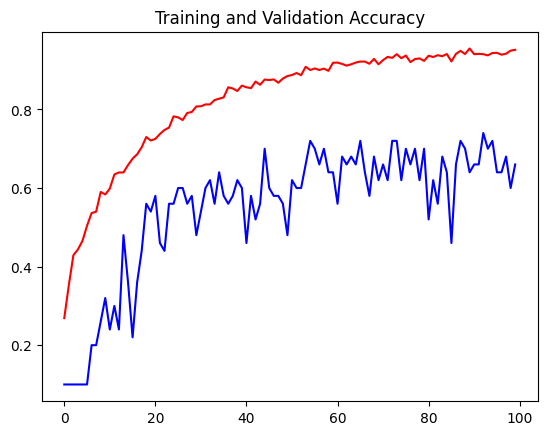

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
Y_pred = np.argmax(y_pred, axis=1)

cm_cnn = confusion_matrix(y_test, Y_pred)
print(cm_cnn)

2/2 [==============================] - 0s 6ms/step
[[4 0 0 0 0 0 0 0 0 1]
 [0 4 0 0 0 0 0 0 0 1]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 1 3 0 0 1 0 0 0]
 [0 0 0 0 1 0 2 0 2 0]
 [0 0 0 0 0 2 0 2 0 1]
 [0 0 0 0 1 0 3 1 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 1 0 0 1 0 0 3 0]
 [1 0 2 0 0 0 0 0 0 2]]


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


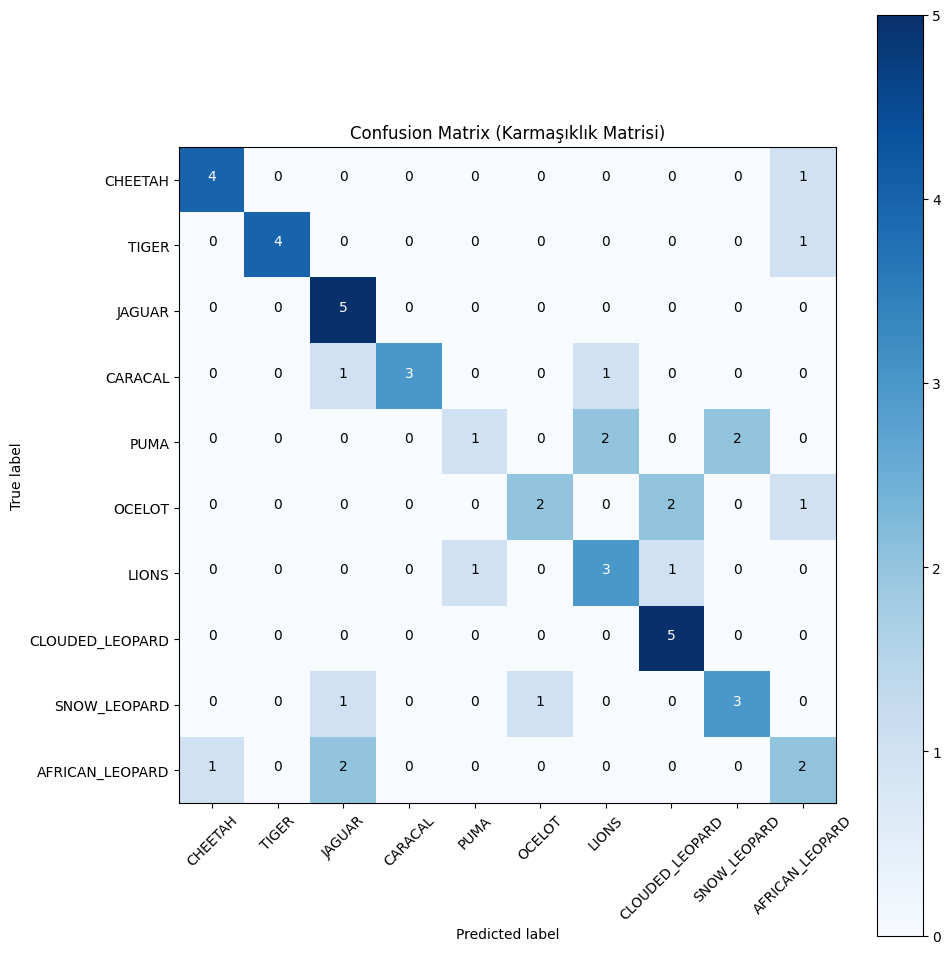

In [ ]:
plot_confusion_matrix(cm_cnn, CATEGORIES, normalize=False, title='Confusion Matrix (Karmaşıklık Matrisi)')

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.80      0.89         5
           2       0.56      1.00      0.71         5
           3       1.00      0.60      0.75         5
           4       0.50      0.20      0.29         5
           5       0.67      0.40      0.50         5
           6       0.50      0.60      0.55         5
           7       0.62      1.00      0.77         5
           8       0.60      0.60      0.60         5
           9       0.40      0.40      0.40         5

    accuracy                           0.64        50
   macro avg       0.66      0.64      0.63        50
weighted avg       0.66      0.64      0.63        50




# **TRANSFER LEARNING**

# *RESNET50*

In [ ]:
res = tf.keras.applications.ResNet50V2(
    input_shape=(100, 100, 3),
    include_top = False
)

res.trainable = False

In [ ]:
res_model = Sequential()

res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(10, activation='softmax'))

In [ ]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()

hist = res_model.fit(x_train, train_yCl,
                     batch_size=128,
                     epochs = 50,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

Epoch 1/50
19/19 [==============================] - 8s 187ms/step - loss: 1.3774 - accuracy: 0.5853 - val_loss: 1.6292 - val_accuracy: 0.6600
Epoch 2/50
19/19 [==============================] - 2s 85ms/step - loss: 0.6083 - accuracy: 0.7931 - val_loss: 1.0668 - val_accuracy: 0.7000
Epoch 3/50
19/19 [==============================] - 2s 85ms/step - loss: 0.4132 - accuracy: 0.8563 - val_loss: 0.8266 - val_accuracy: 0.7000
Epoch 4/50
19/19 [==============================] - 2s 84ms/step - loss: 0.3021 - accuracy: 0.8957 - val_loss: 0.7381 - val_accuracy: 0.7600
Epoch 5/50
19/19 [==============================] - 2s 85ms/step - loss: 0.2370 - accuracy: 0.9218 - val_loss: 0.6214 - val_accuracy: 0.6200
Epoch 6/50
19/19 [==============================] - 2s 86ms/step - loss: 0.1770 - accuracy: 0.9457 - val_loss: 0.6553 - val_accuracy: 0.7600
Epoch 7/50
19/19 [==============================] - 2s 86ms/step - loss: 0.1322 - accuracy: 0.9619 - val_loss: 0.6127 - val_accuracy: 0.7200
Epoch 8/50
1

In [ ]:
score_train_RESNET = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_RESNET[1])

score_test_RESNET = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_RESNET[1])

score_val_RESNET = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_RESNET[1])

74/74 [==============================] - 2s 29ms/step - loss: 0.0014 - accuracy: 1.0000
Train Accuracy:  1.0
2/2 [==============================] - 0s 22ms/step - loss: 0.7335 - accuracy: 0.8400
Test Accuracy:  0.8399999737739563
2/2 [==============================] - 0s 24ms/step - loss: 0.6854 - accuracy: 0.8600
Validation Accuracy:  0.8600000143051147


2/2 [==============================] - 1s 38ms/step


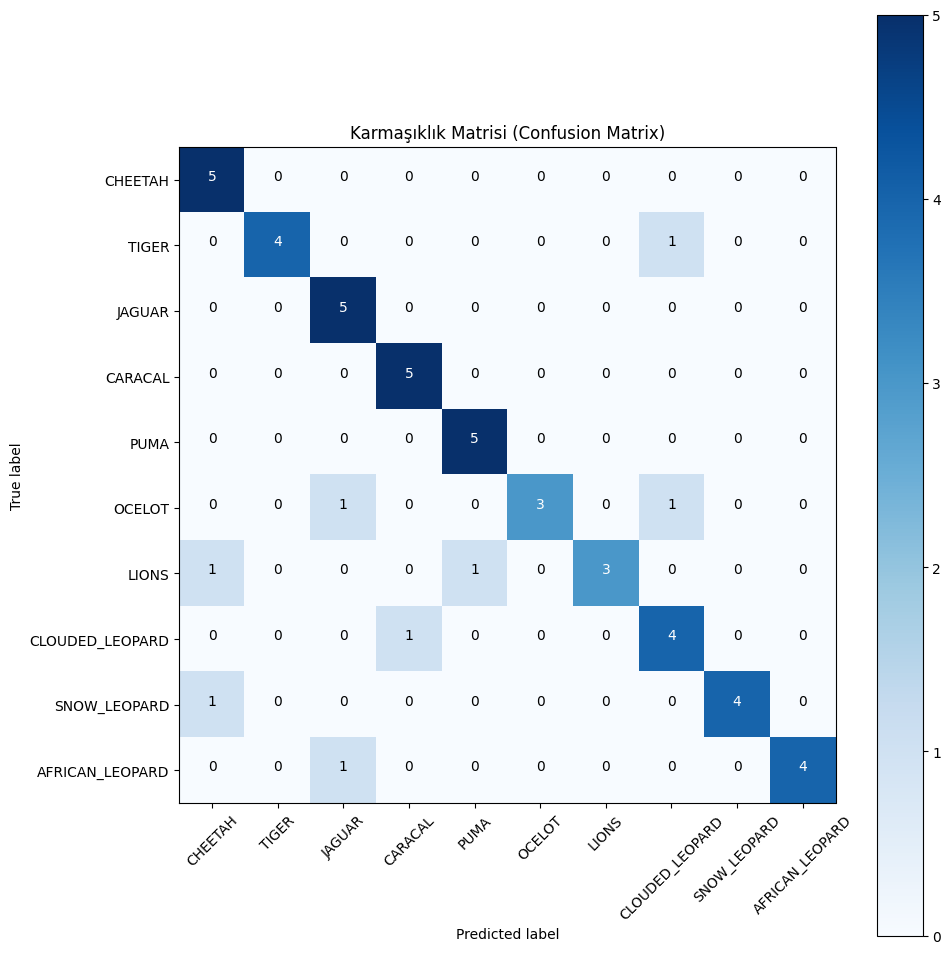

In [ ]:
#target_names = ['CHEETAH','TIGER','JAGUAR','CARACAL','PUMA','OCELOT','LIONS','CLOUDED_LEOPARD','SNOW_LEOPARD','AFRICAN_LEOPARD']
labels_names = [0,1,2,3,4,5,6,7,8,9]

Y_pred = res_model.predict(x_test)

y_pred_resnet = np.argmax(Y_pred, axis=1)

cm_RESNET = confusion_matrix(y_test, y_pred_resnet)
plot_confusion_matrix(cm_RESNET, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [ ]:
print(classification_report(y_test,y_pred_resnet ))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.80      0.89         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       1.00      0.60      0.75         5
           6       1.00      0.60      0.75         5
           7       0.67      0.80      0.73         5
           8       1.00      0.80      0.89         5
           9       1.00      0.80      0.89         5

    accuracy                           0.84        50
   macro avg       0.88      0.84      0.84        50
weighted avg       0.88      0.84      0.84        50



# *INCEPTIONv3*

In [ ]:
inceptionv3 = tf.keras.applications.InceptionV3(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

inceptionv3.trainable = False

In [ ]:
inceptionv3_model = Sequential()

inceptionv3_model.add(inceptionv3)
inceptionv3_model.add(Dropout(0.25))
#inceptionv3_model.add(MaxPooling2D())
inceptionv3_model.add(Flatten())
inceptionv3_model.add(Dense(256, activation='relu'))
inceptionv3_model.add(BatchNormalization())
inceptionv3_model.add(Dropout(0.5))
inceptionv3_model.add(Dense(10, activation='softmax'))

In [ ]:
inceptionv3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()

hist = inceptionv3_model.fit(x_train, train_yCl,
                     batch_size=128,
                     epochs = 50,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

Epoch 1/50
19/19 [==============================] - 10s 202ms/step - loss: 2.1966 - accuracy: 0.3801 - val_loss: 2.0237 - val_accuracy: 0.4800
Epoch 2/50
19/19 [==============================] - 1s 51ms/step - loss: 1.2171 - accuracy: 0.6020 - val_loss: 1.2804 - val_accuracy: 0.6000
Epoch 3/50
19/19 [==============================] - 1s 51ms/step - loss: 0.9705 - accuracy: 0.6657 - val_loss: 1.0973 - val_accuracy: 0.6400
Epoch 4/50
19/19 [==============================] - 1s 52ms/step - loss: 0.8518 - accuracy: 0.7063 - val_loss: 1.0115 - val_accuracy: 0.6200
Epoch 5/50
19/19 [==============================] - 1s 53ms/step - loss: 0.7906 - accuracy: 0.7153 - val_loss: 1.0620 - val_accuracy: 0.7000
Epoch 6/50
19/19 [==============================] - 1s 52ms/step - loss: 0.7264 - accuracy: 0.7422 - val_loss: 1.0207 - val_accuracy: 0.6800
Epoch 7/50
19/19 [==============================] - 1s 56ms/step - loss: 0.6630 - accuracy: 0.7721 - val_loss: 0.9607 - val_accuracy: 0.7200
Epoch 8/50


In [ ]:
score_train_INCEPV3 = inceptionv3_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_INCEPV3[1])

score_test_INCEPV3 = inceptionv3_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_INCEPV3[1])

score_val_INCEPV3 = inceptionv3_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_INCEPV3[1])

74/74 [==============================] - 3s 27ms/step - loss: 0.0236 - accuracy: 1.0000
Train Accuracy:  1.0
2/2 [==============================] - 1s 850ms/step - loss: 0.7187 - accuracy: 0.7400
Test Accuracy:  0.7400000095367432
2/2 [==============================] - 0s 23ms/step - loss: 1.1040 - accuracy: 0.6800
Validation Accuracy:  0.6800000071525574


2/2 [==============================] - 0s 26ms/step


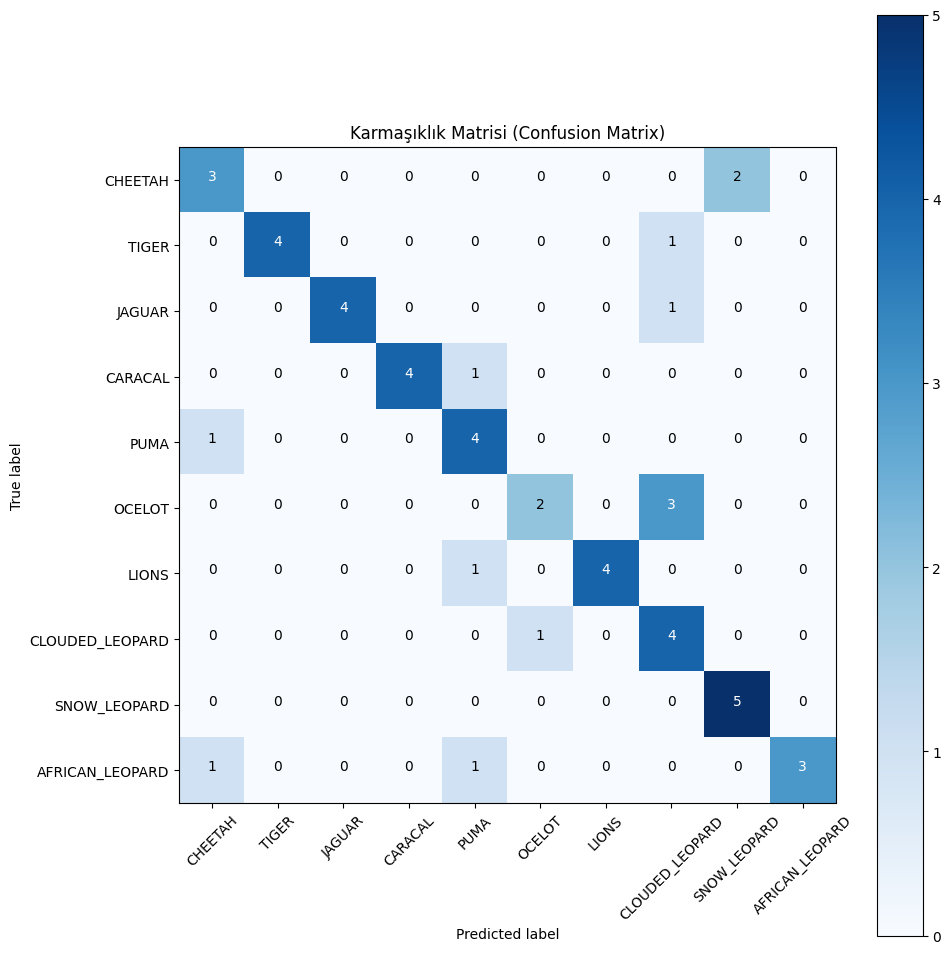

In [ ]:
#target_names = ['CHEETAH','TIGER','JAGUAR','CARACAL','PUMA','OCELOT','LIONS','CLOUDED_LEOPARD','SNOW_LEOPARD','AFRICAN_LEOPARD']
labels_names = [0,1,2,3,4,5,6,7,8,9]

Y_pred = inceptionv3_model.predict(x_test)

y_pred_INCEPV3 = np.argmax(Y_pred, axis=1)

cm_INCEPV3 = confusion_matrix(y_test, y_pred_INCEPV3)
plot_confusion_matrix(cm_INCEPV3, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [ ]:
print(classification_report(y_test,y_pred_INCEPV3 ))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      0.80      0.89         5
           2       1.00      0.80      0.89         5
           3       1.00      0.80      0.89         5
           4       0.57      0.80      0.67         5
           5       0.67      0.40      0.50         5
           6       1.00      0.80      0.89         5
           7       0.44      0.80      0.57         5
           8       0.71      1.00      0.83         5
           9       1.00      0.60      0.75         5

    accuracy                           0.74        50
   macro avg       0.80      0.74      0.75        50
weighted avg       0.80      0.74      0.75        50



# *XCEPTION*

In [ ]:
#from tensorflow.keras.applications import Xception

xception = tf.keras.applications.Xception(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

xception.trainable = False

In [ ]:
xception_model = Sequential()

xception_model.add(xception)
xception_model.add(Dropout(0.25))
xception_model.add(MaxPooling2D())
xception_model.add(Flatten())
xception_model.add(Dense(256, activation='relu'))
xception_model.add(BatchNormalization())
xception_model.add(Dropout(0.5))
xception_model.add(Dense(10, activation='softmax'))

In [ ]:
xception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()

hist = xception_model.fit(x_train, train_yCl,
                     batch_size=128,
                     epochs = 50,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

Epoch 1/50
19/19 [==============================] - 7s 181ms/step - loss: 1.4958 - accuracy: 0.5229 - val_loss: 0.9315 - val_accuracy: 0.7000
Epoch 2/50
19/19 [==============================] - 2s 97ms/step - loss: 0.8259 - accuracy: 0.7084 - val_loss: 0.7207 - val_accuracy: 0.7400
Epoch 3/50
19/19 [==============================] - 2s 97ms/step - loss: 0.6937 - accuracy: 0.7503 - val_loss: 0.7932 - val_accuracy: 0.7200
Epoch 4/50
19/19 [==============================] - 2s 97ms/step - loss: 0.6085 - accuracy: 0.7773 - val_loss: 0.8170 - val_accuracy: 0.7400
Epoch 5/50
19/19 [==============================] - 2s 97ms/step - loss: 0.4862 - accuracy: 0.8170 - val_loss: 0.7003 - val_accuracy: 0.7600
Epoch 6/50
19/19 [==============================] - 2s 98ms/step - loss: 0.4486 - accuracy: 0.8354 - val_loss: 0.6340 - val_accuracy: 0.7800
Epoch 7/50
19/19 [==============================] - 2s 99ms/step - loss: 0.3985 - accuracy: 0.8555 - val_loss: 0.8187 - val_accuracy: 0.7200
Epoch 8/50
1

In [ ]:
score_train_XCEP = xception_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_XCEP[1])

score_test_XCEP = xception_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_XCEP[1])

score_val_XCEP = xception_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_XCEP[1])

74/74 [==============================] - 3s 31ms/step - loss: 0.0412 - accuracy: 0.9966
Train Accuracy:  0.9965797066688538
2/2 [==============================] - 0s 337ms/step - loss: 0.5438 - accuracy: 0.8400
Test Accuracy:  0.8399999737739563
2/2 [==============================] - 0s 19ms/step - loss: 0.7940 - accuracy: 0.7400
Validation Accuracy:  0.7400000095367432


2/2 [==============================] - 1s 38ms/step


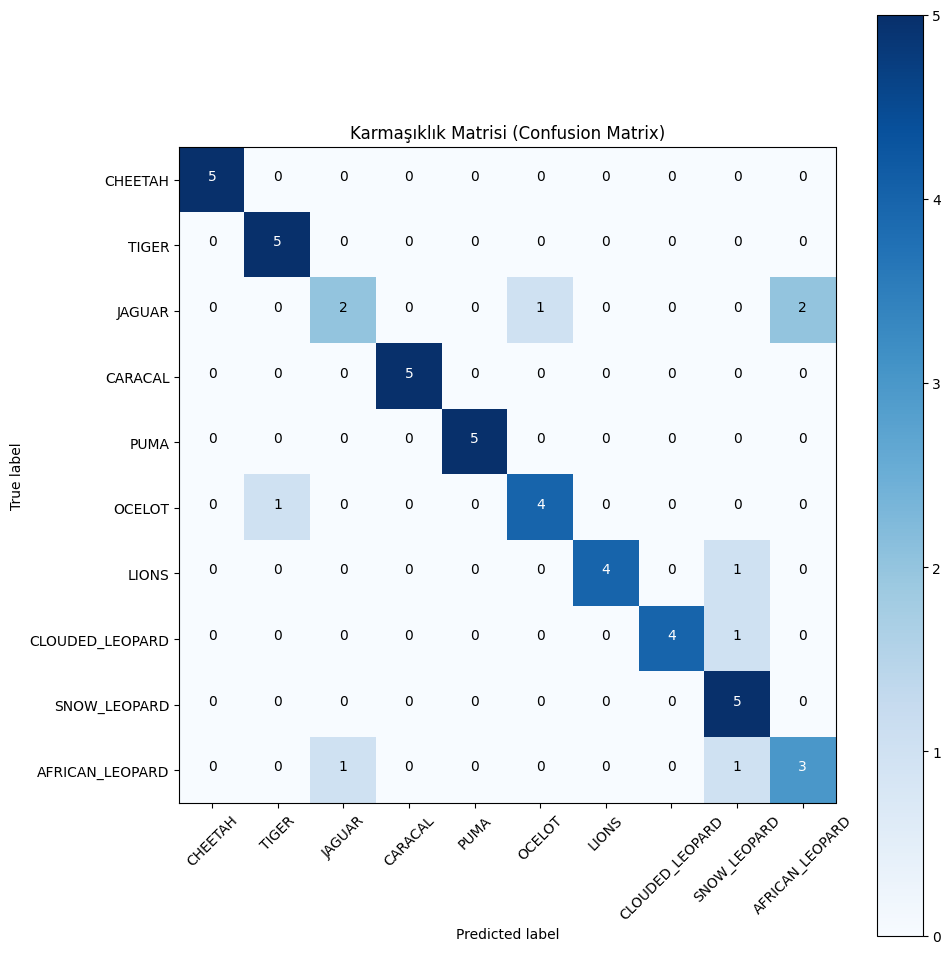

In [ ]:
#target_names = ['CHEETAH','TIGER','JAGUAR','CARACAL','PUMA','OCELOT','LIONS','CLOUDED_LEOPARD','SNOW_LEOPARD','AFRICAN_LEOPARD']
labels_names = [0,1,2,3,4,5,6,7,8,9]

Y_pred = xception_model.predict(x_test)

y_pred_XCEP = np.argmax(Y_pred, axis=1)

cm_XCEP = confusion_matrix(y_test, y_pred_XCEP)
plot_confusion_matrix(cm_XCEP, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [ ]:
print(classification_report(y_test,y_pred_XCEP ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       0.67      0.40      0.50         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.80      0.80      0.80         5
           6       1.00      0.80      0.89         5
           7       1.00      0.80      0.89         5
           8       0.62      1.00      0.77         5
           9       0.60      0.60      0.60         5

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50



# *VGG-16 ve VGG-19*

In [ ]:
vgg16 = tf.keras.applications.VGG16(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

'''
vgg19 = tf.keras.applications.VGG19(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)
'''
vgg16.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg16_model = Sequential()

vgg16_model.add(vgg16)
vgg16_model.add(Dropout(0.25))
vgg16_model.add(MaxPooling2D())
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(10, activation='softmax'))

In [ ]:
vgg16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()

hist = vgg16_model.fit(x_train, train_yCl,
                       batch_size=128,
                     epochs = 50,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

Epoch 1/50
19/19 [==============================] - 12s 375ms/step - loss: 2.2176 - accuracy: 0.3288 - val_loss: 1.4189 - val_accuracy: 0.5600
Epoch 2/50
19/19 [==============================] - 3s 150ms/step - loss: 1.3085 - accuracy: 0.5780 - val_loss: 1.1726 - val_accuracy: 0.6800
Epoch 3/50
19/19 [==============================] - 3s 151ms/step - loss: 1.0786 - accuracy: 0.6298 - val_loss: 1.0529 - val_accuracy: 0.7000
Epoch 4/50
19/19 [==============================] - 3s 152ms/step - loss: 0.9793 - accuracy: 0.6575 - val_loss: 0.9082 - val_accuracy: 0.7400
Epoch 5/50
19/19 [==============================] - 3s 150ms/step - loss: 0.8798 - accuracy: 0.6930 - val_loss: 0.8672 - val_accuracy: 0.7600
Epoch 6/50
19/19 [==============================] - 3s 148ms/step - loss: 0.8204 - accuracy: 0.7024 - val_loss: 0.8418 - val_accuracy: 0.7200
Epoch 7/50
19/19 [==============================] - 3s 146ms/step - loss: 0.7704 - accuracy: 0.7345 - val_loss: 0.8367 - val_accuracy: 0.7000
Epoch

In [ ]:
score_train_VGG16 = vgg16_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_VGG16[1])

score_test_VGG16 = vgg16_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_VGG16[1])

score_val_VGG16 = vgg16_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_VGG16[1])

74/74 [==============================] - 4s 39ms/step - loss: 0.1154 - accuracy: 0.9906
Train Accuracy:  0.9905942678451538
2/2 [==============================] - 1s 743ms/step - loss: 0.5947 - accuracy: 0.7800
Test Accuracy:  0.7799999713897705
2/2 [==============================] - 0s 27ms/step - loss: 0.6975 - accuracy: 0.7200
Validation Accuracy:  0.7200000286102295


2/2 [==============================] - 0s 41ms/step


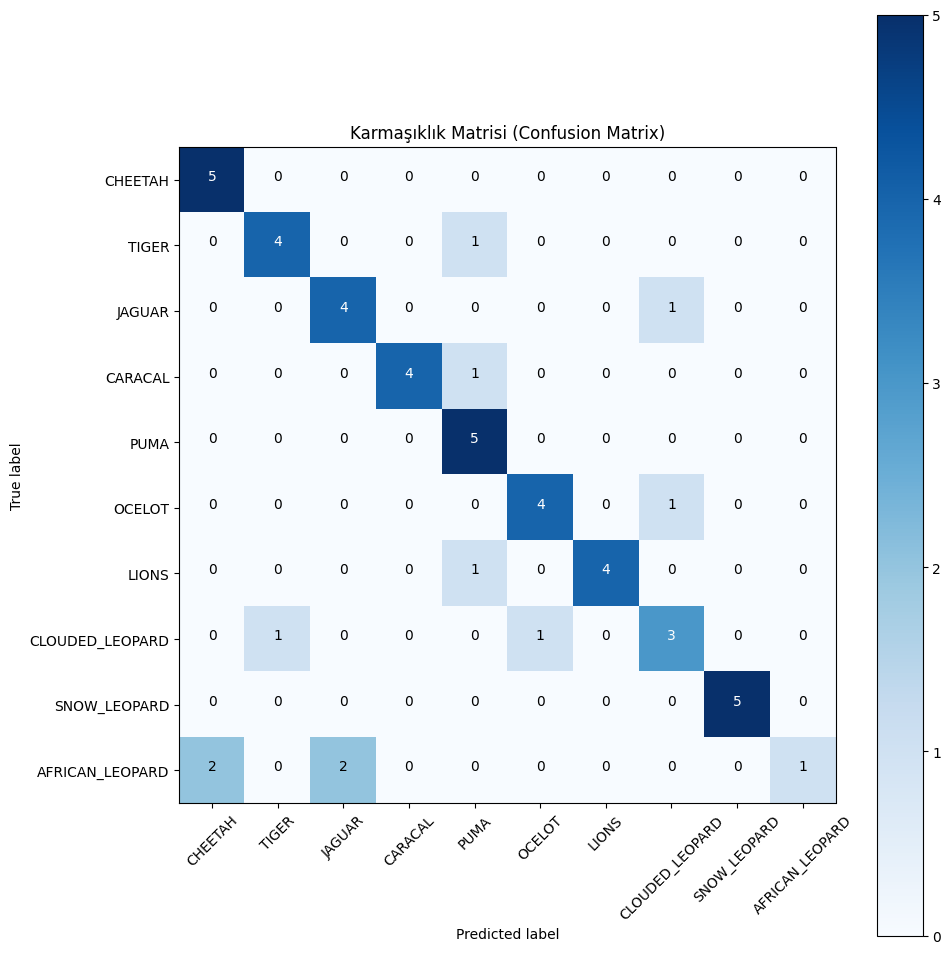

In [ ]:
Y_pred = vgg16_model.predict(x_test)

y_pred_VGG16 = np.argmax(Y_pred, axis=1)

cm_VGG16 = confusion_matrix(y_test, y_pred_VGG16)
plot_confusion_matrix(cm_VGG16, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [ ]:
print(classification_report(y_test,y_pred_VGG16 ))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.80      0.80      0.80         5
           2       0.67      0.80      0.73         5
           3       1.00      0.80      0.89         5
           4       0.62      1.00      0.77         5
           5       0.80      0.80      0.80         5
           6       1.00      0.80      0.89         5
           7       0.60      0.60      0.60         5
           8       1.00      1.00      1.00         5
           9       1.00      0.20      0.33         5

    accuracy                           0.78        50
   macro avg       0.82      0.78      0.76        50
weighted avg       0.82      0.78      0.76        50



# *MOBILENET*

In [ ]:
mobilenet = tf.keras.applications.MobileNet(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

17225924/17225924 [==============================] - 1s 0us/step


# *DENSENET*

In [ ]:
densenet = tf.keras.applications.DenseNet121(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

densenet.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
densenet_model = Sequential()

densenet_model.add(densenet)
densenet_model.add(Dropout(0.25))
densenet_model.add(MaxPooling2D())
densenet_model.add(Flatten())
densenet_model.add(Dense(256, activation='relu'))
densenet_model.add(BatchNormalization())
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(10, activation='softmax'))

In [ ]:
densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()

hist = densenet_model.fit(x_train, train_yCl,
                       batch_size=128,
                     epochs = 50,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

Epoch 1/50
19/19 [==============================] - 12s 282ms/step - loss: 1.7524 - accuracy: 0.4673 - val_loss: 1.2425 - val_accuracy: 0.7200
Epoch 2/50
19/19 [==============================] - 2s 91ms/step - loss: 0.8055 - accuracy: 0.7208 - val_loss: 0.7753 - val_accuracy: 0.7400
Epoch 3/50
19/19 [==============================] - 2s 87ms/step - loss: 0.5872 - accuracy: 0.7939 - val_loss: 0.6766 - val_accuracy: 0.7800
Epoch 4/50
19/19 [==============================] - 2s 85ms/step - loss: 0.4973 - accuracy: 0.8221 - val_loss: 0.5159 - val_accuracy: 0.8000
Epoch 5/50
19/19 [==============================] - 2s 87ms/step - loss: 0.4513 - accuracy: 0.8350 - val_loss: 0.4734 - val_accuracy: 0.8000
Epoch 6/50
19/19 [==============================] - 2s 88ms/step - loss: 0.4140 - accuracy: 0.8559 - val_loss: 0.4360 - val_accuracy: 0.7800
Epoch 7/50
19/19 [==============================] - 2s 87ms/step - loss: 0.3635 - accuracy: 0.8764 - val_loss: 0.4186 - val_accuracy: 0.8000
Epoch 8/50


In [ ]:
score_train_DenseNet = densenet_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_DenseNet[1])

score_test_DenseNet = densenet_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_DenseNet[1])

score_val_DenseNet = densenet_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_DenseNet[1])

74/74 [==============================] - 4s 38ms/step - loss: 0.0247 - accuracy: 0.9996
Train Accuracy:  0.9995724558830261
2/2 [==============================] - 1s 1s/step - loss: 0.4236 - accuracy: 0.8400
Test Accuracy:  0.8399999737739563
2/2 [==============================] - 0s 23ms/step - loss: 0.5903 - accuracy: 0.8000
Validation Accuracy:  0.800000011920929


2/2 [==============================] - 2s 33ms/step


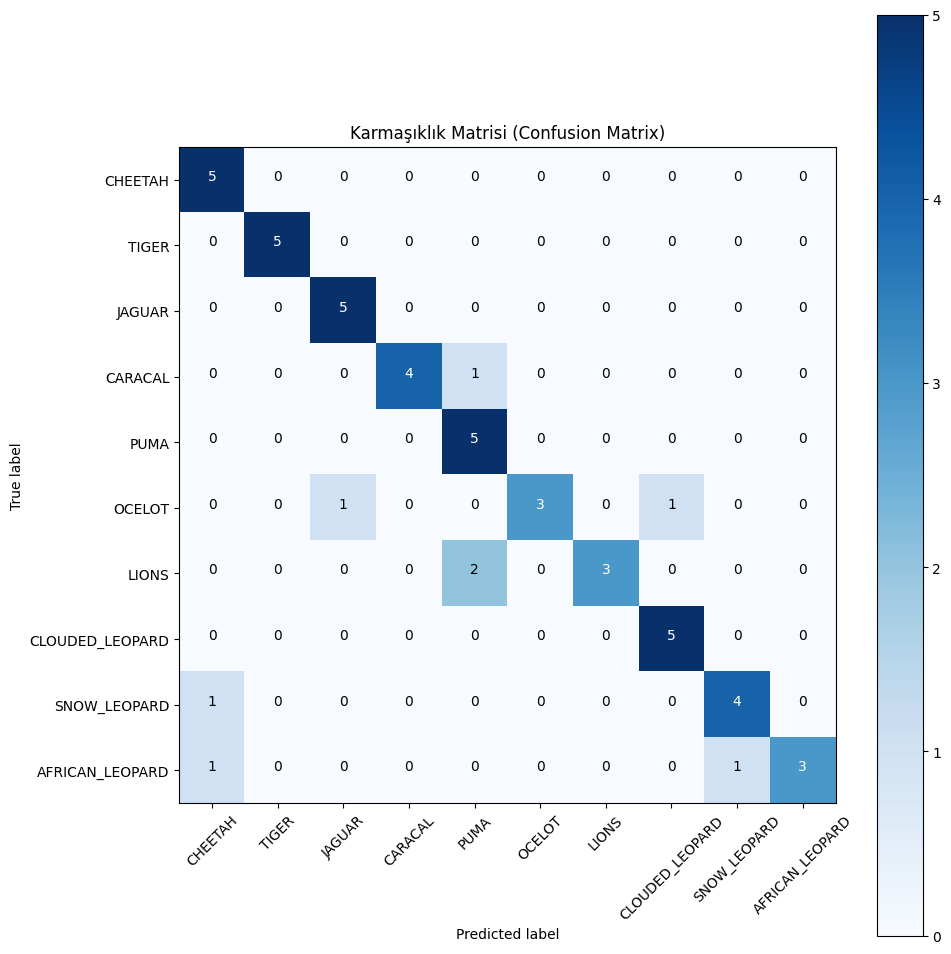

In [ ]:
Y_pred = densenet_model.predict(x_test)

y_pred_DenseNet = np.argmax(Y_pred, axis=1)

cm_DenseNet = confusion_matrix(y_test, y_pred_DenseNet)
plot_confusion_matrix(cm_DenseNet, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [ ]:
print(classification_report(y_test,y_pred_DenseNet ))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5
           4       0.62      1.00      0.77         5
           5       1.00      0.60      0.75         5
           6       1.00      0.60      0.75         5
           7       0.83      1.00      0.91         5
           8       0.80      0.80      0.80         5
           9       1.00      0.60      0.75         5

    accuracy                           0.84        50
   macro avg       0.88      0.84      0.84        50
weighted avg       0.88      0.84      0.84        50

